**Importing the neccessary libraries**

In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix


**Loading the heart dataset from Kaggle 2022**

In [3]:
path = "heart_data.csv"
data = pd.read_csv(path)

**Getting insights about the data**

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
data.shape

(303, 14)

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Getting some visual insights about the data**

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

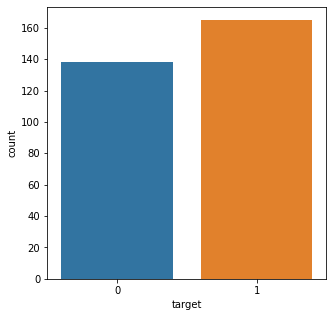

In [10]:
import seaborn as sns
plt.figure(1 , figsize=(5,5))
sns.countplot(data['target'])

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

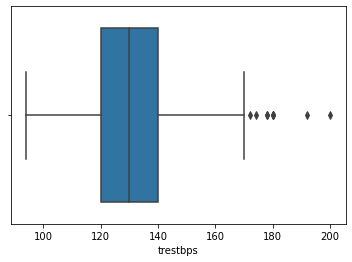

In [11]:
sns.boxplot(data['trestbps'])

Text(0.5, 1.0, 'age VS trestbps')

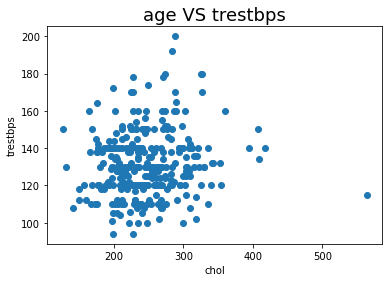

In [12]:
x=data['chol']
y=data['trestbps']
plt.scatter(x,y)
plt.xlabel('chol')
plt.ylabel('trestbps')
plt.title("age VS trestbps", size=18)

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'age VS chol')

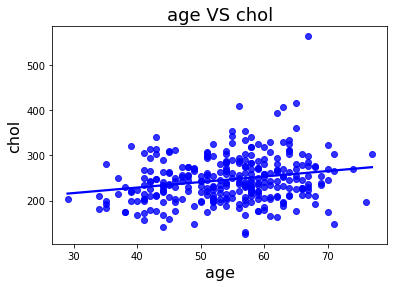

In [13]:
X = data['age']
Y = data['chol']
sns.regplot(X, Y,ci=None,color='b')
plt.xlabel("age", size=16)
plt.ylabel("chol", size=16)
plt.title("age VS chol", size=18)

**Splitting the data for training and testing**

In [17]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [18]:
features = data.drop(columns='target', axis=1)
target = data['target']
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,random_state=4, stratify=target)


**Creating,Training the model**

In [19]:
#creating the model
# LogisticRegression is used here because the data or target is categorical with (0 and 1)  
Model =  LogisticRegression()
#Training the model with the feature and target training data's
Model = Model.fit(X_train,Y_train)


C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Evaluating the model**

In [20]:
# training accuracy

Training_Model_prediction = Model.predict(X_train)
Training_score = accuracy_score(Y_train,Training_Model_prediction)
Training_score


0.8305785123966942

In [21]:
# testing accuracy 

Testing_Model_prediction =  Model.predict(X_test)
Testing_score = accuracy_score(Y_test,Testing_Model_prediction)
Testing_score

0.8852459016393442

**Building a Predicting system**


In [22]:
# Using new data 
new_data = (38,1,2,138,175,0,1,173,0,0,2,4,2)
# coverting the data to numoy array since the new data is in tuple data-type 
new_data_to_array = np.asarray(new_data)
new_data_as_array = new_data_to_array
#reshaping the data for single instance use 
new_data_reshaped = new_data_as_array.reshape(1,-1)

In [23]:
prediction = Model.predict(new_data_reshaped)
print(prediction)

[1]


C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
if (prediction[0]==0):
    print('''The patient does not have a heart disease''')
else:
    print('''The patient has a heart disease''')

The patient has a heart disease


In [25]:
new_patient = (67,1,0,160,286,0,0,108,1,1.5,1,3,2)
to_array = np.asarray(new_patient)
new_patient_reshaped = to_array.reshape(1,-1)

New_prediction = Model.predict(new_patient_reshaped)


C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:
 if (New_prediction[0]==1):
        print('''The patient has heart disease''')
else:
    print('''The patient has no heart disease''')

The patient has no heart disease


**Thank you !**    
**olatunde olyukoya**